In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Functional API
In this module, we will explore Keras's another model building API called functional API.
Here is the documentation: https://keras.io/getting-started/functional-api-guide/

In `Sequential`, you build a model by adding a layer to the `model` object:

```
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(32,32,3), activation='relu))
model.add(Cond2D(32, 3))
model.add(Activation('relu'))
```

However, in functional API, you define the inpute parameters and pass the input into the appropiate layer and the subsequent output is passed as input into the appropiate layer.  Lastly you define the inputs and outputs in a Model layer:   
```
inputs = Input(shape=(32,32,3))
conv1 = Conv2D(32,3, activation='relu')(inputs)
conv2 = Conv2D(32,3)(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
output = Dense(10, activation='softmax')(conv2)

model = Model(inputs=inputs, outputs=output)
```
As you can see from above, the functional API model needs a separate layer for input and output. Input() creates the the input tensor. Model() makes a model object from the output tensor. 

An advantage of functional API over Sequential is its flexibility. You can build a model architecture that has parallel paths or merging layers.

```
conv1 = Conv2D(32,3,activation='relu')(conv0)
conv2 = Conv2D(32,5,activation='relu')(conv0)
concat = Concatenate(axis=-1)([conv1, conv2])
conv3 = Conv2D(32,3,activation='relu')(concat)

```
The above example shows that the feature map from conv0 is split into two paths which are passed to conv1, and conv2 and then concatenated before passing to conv3:

```

         ____ conv1 (3x3)____
        /                    \   
conv0---                      (concatenate) -- conv3 (3x3)
        \____ conv2 (5x5)____/
        
```

# Below is an exmaple of building a Functional API model using the CIFAR10 dataset

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model # This will print model architecture.
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation # We add the Concatentate function
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, SeparableConv2D # We will use AveragePooling2D. Similar to MaxPooling but now we take the average value in the window.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# fix random seed for reproducibility
np.random.seed(42)

# load data
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

# Reshape xblock data and normalize
train_images =  train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32')/test_images.max()

# convert to labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#split into validation
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

170500096/170498071 [==============================] - 4s 0us/step


#Here is an example on how to build a Functional API architecture

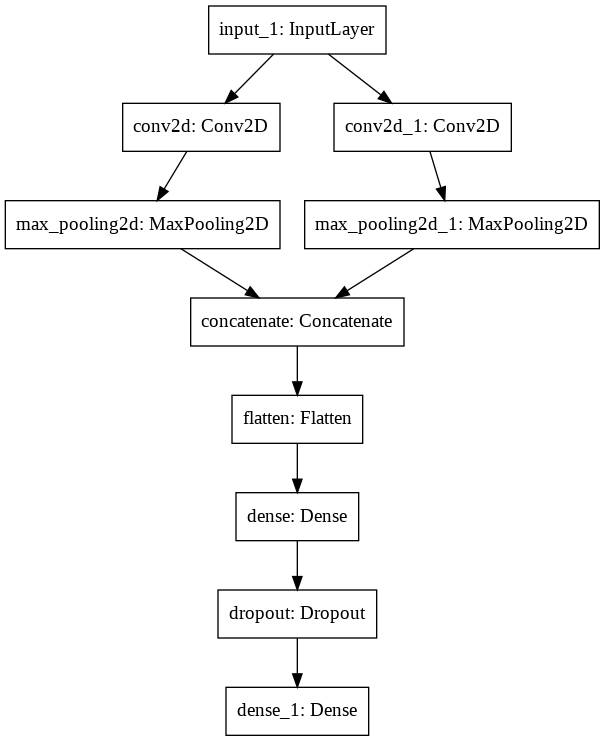

In [0]:
backend.clear_session()

# first input model
visible = Input(shape=(28,28,1))

# Create Tower 1
conv11 = Conv2D(32, (3,3), padding = 'same', activation='relu')(visible)
pool11 = MaxPooling2D((2, 2), padding = 'same')(conv11)

# Create Tower 2
conv21 = Conv2D(32, (3,3), padding = 'same', activation='relu')(visible)
pool21 = MaxPooling2D((2,2), padding = 'same')(conv21)

# Concatentate
merge = Concatenate(axis=-1)([pool11, pool21])

# Flatten into fully connected layer
flat = Flatten()(merge)

# Hidden connected layer and output
hidden = Dense(32, activation='relu')(flat)
drop = Dropout(0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model_example = Model(inputs=visible, outputs=output)
# plot graph
plot_model(model_example)

# Your Turn

### Build the Inception model found in figure 7.8 in Deep Learning with Python (Chollet) 
### Print (plot) the model architecture (10 points)

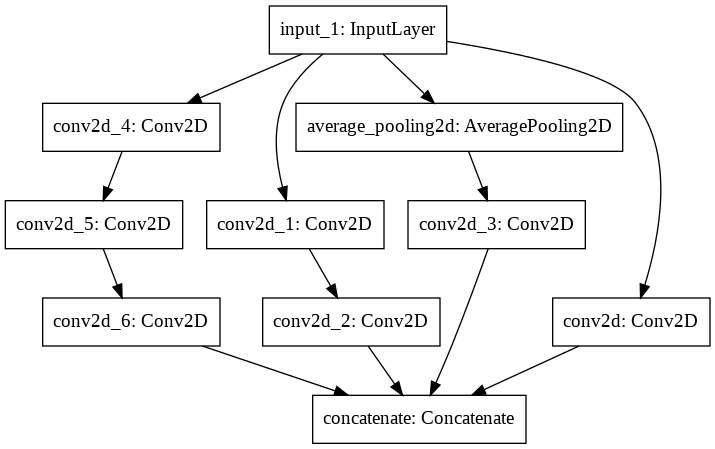

In [4]:
# Build and print (plot) the model architecture found in figure 7.8 (Chollet)
# Tower 1
backend.clear_session()

visible1 = Input(shape=(32,32,3))

# Tower 1
tower111 = Conv2D(64, (1,1), strides = 2, padding='same', activation='relu')(visible1)

# Tower 2
tower121 = Conv2D(64, (1,1), padding='same', activation='relu')(visible1)
tower122 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower121)


# Tower 3
tower131 = AveragePooling2D((3,3), strides = 2, padding='same')(visible1)
tower132 = Conv2D(64, (3,3), padding='same', activation='relu')(tower131)


# Tower 4
tower141 = Conv2D(64, (1,1), padding='same', activation='relu')(visible1)
tower142 = Conv2D(64, (3,3), padding='same', activation='relu')(tower141)
tower143 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower142)

# Compile
output = Concatenate(axis=-1)([tower111, tower122, tower132, tower143])


model_fig = Model(inputs=visible1, outputs=output)

# plot graph
plot_model(model_fig)

### Build the model that is shown in the Week_5_API_Model_Architecture.png figure under the Week 5 Content tab.  Choose the number of hidden units (nodes) in each layer.  Then compile, fit, plot, and assess on the test data all in one cell. (20 points) 

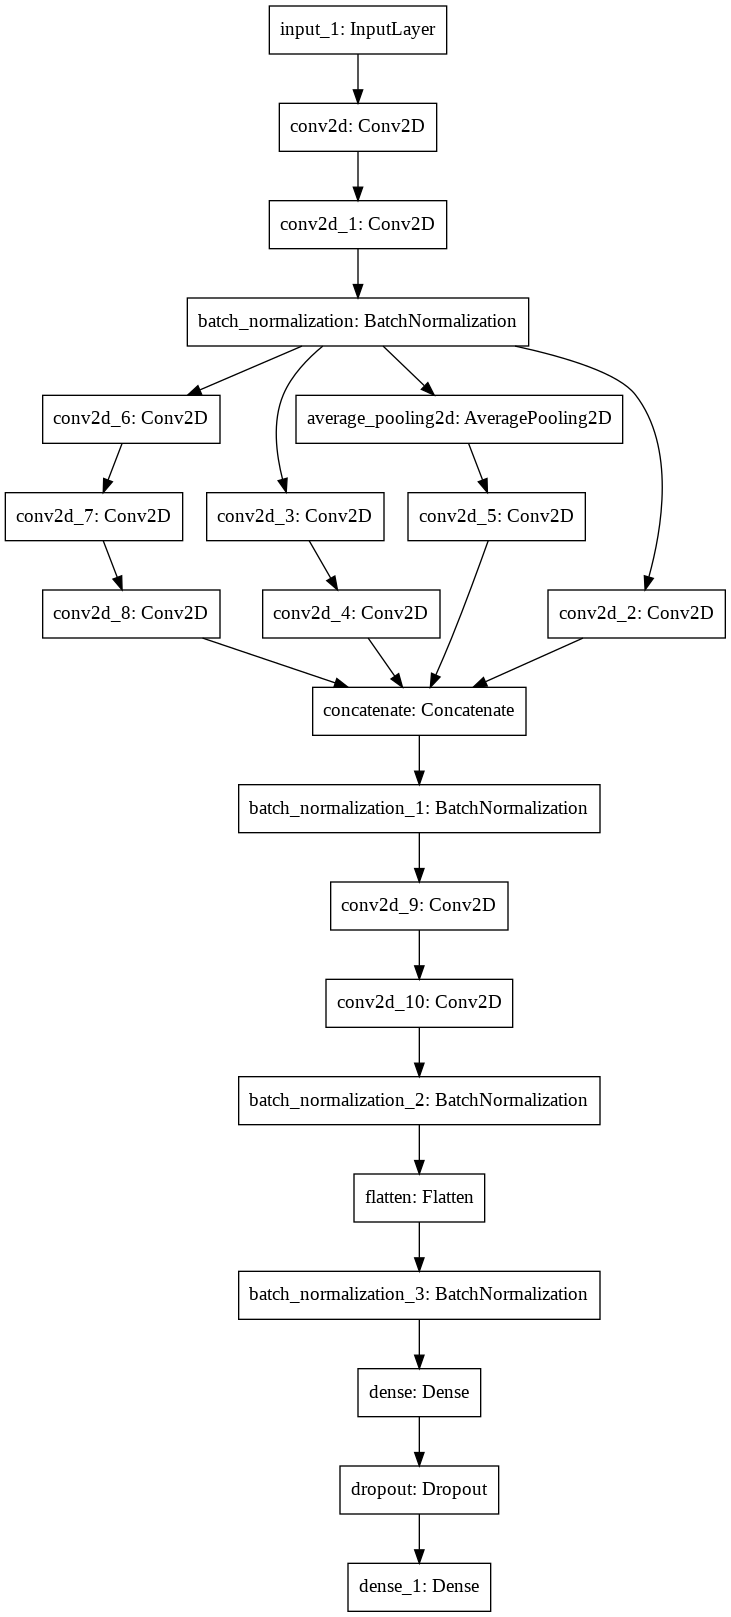

In [0]:
# Build, complie, fit, plot, and assess in one cell.  
# first input model
backend.clear_session()
visible1 = Input(shape=(32,32,3))

# Conv2D
conv11 = Conv2D(32, (3,3), padding='same', activation='relu')(visible1)
conv12 = Conv2D(32, (3,3), padding='same', activation='relu')(conv11)
batch1 = BatchNormalization(axis = -1)(conv12)

# Tower 1
tower111 = Conv2D(64, (1,1), strides = 2, padding='same', activation='relu')(batch1)

# Tower 2
tower121 = Conv2D(64, (1,1), padding='same', activation='relu')(batch1)
tower122 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower121)


# Tower 3
tower131 = AveragePooling2D((3,3), strides = 2, padding='same')(batch1)
tower132 = Conv2D(64, (3,3), padding='same', activation='relu')(tower131)


# Tower 4
tower141 = Conv2D(64, (1,1), padding='same', activation='relu')(batch1)
tower142 = Conv2D(64, (3,3), padding='same', activation='relu')(tower141)
tower143 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower142)


# Concatenate
concat1 = Concatenate(axis=-1)([tower111, tower122, tower132, tower143])
batch2 = BatchNormalization(axis = -1)(concat1)

# Conv2D
conv21 = Conv2D(64, (3,3), padding='same', activation='relu')(batch2)
conv22 = Conv2D(64, (3,3), padding='same', activation='relu')(conv21)
batch3 = BatchNormalization(axis = -1)(conv22)

# Flatten
flat = Flatten()(batch3)
batch4 = BatchNormalization(axis = -1)(flat)

# Dense and output
dense1 = Dense(128, activation='relu')(batch4)
drop = Dropout(0.5)(dense1)
output = Dense(10, activation='softmax')(drop)

Model_Architecture = Model(inputs=visible1, outputs=output)

# plot graph
plot_model(Model_Architecture)

Epoch 1/50
1172/1172 [==============================] - 14s 12ms/step - loss: 2.0820 - accuracy: 0.3331 - val_loss: 1.8447 - val_accuracy: 0.3402
Epoch 2/50
1172/1172 [==============================] - 14s 12ms/step - loss: 1.5371 - accuracy: 0.4435 - val_loss: 1.4524 - val_accuracy: 0.4865
Epoch 3/50
1172/1172 [==============================] - 14s 12ms/step - loss: 1.3543 - accuracy: 0.5147 - val_loss: 1.8166 - val_accuracy: 0.5182
Epoch 4/50
1172/1172 [==============================] - 14s 12ms/step - loss: 1.2289 - accuracy: 0.5629 - val_loss: 1.0755 - val_accuracy: 0.6238
Epoch 5/50
1172/1172 [==============================] - 14s 12ms/step - loss: 1.1238 - accuracy: 0.6088 - val_loss: 1.0218 - val_accuracy: 0.6390
Epoch 6/50
1172/1172 [==============================] - 14s 12ms/step - loss: 1.0285 - accuracy: 0.6367 - val_loss: 1.0051 - val_accuracy: 0.6632
Epoch 7/50
1172/1172 [==============================] - 14s 12ms/step - loss: 0.9530 - accuracy: 0.6667 - val_loss: 0.9825 -

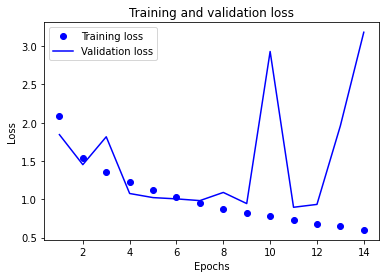

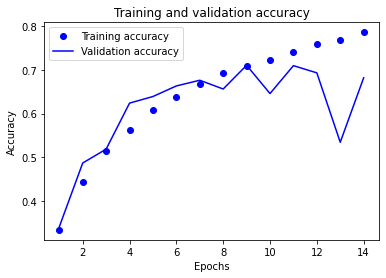

313/313 [==============================] - 1s 4ms/step - loss: 0.9899 - accuracy: 0.7029
test_accuracy: 0.7028999924659729


In [0]:
Model_Architecture.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])


history = Model_Architecture.fit(x_train, y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

test_loss, test_acc = Model_Architecture.evaluate(test_images, test_labels)
print('test_accuracy:', test_acc)

### Optimize your neural network. Try using SeparableConv2D layers (Chollet 7.3.1) add or remove layers, change the number of units (nodes), add or remove regularization and normalization. Spend sometime optimizing the network using the techniques we have learned thus far.  Feel free to do your own research on best arcitectures.  Can you improve your test accuracy above 0.80%, which was the benchmark last week? Please remember to compile, plot, assess on test data all in one cell.

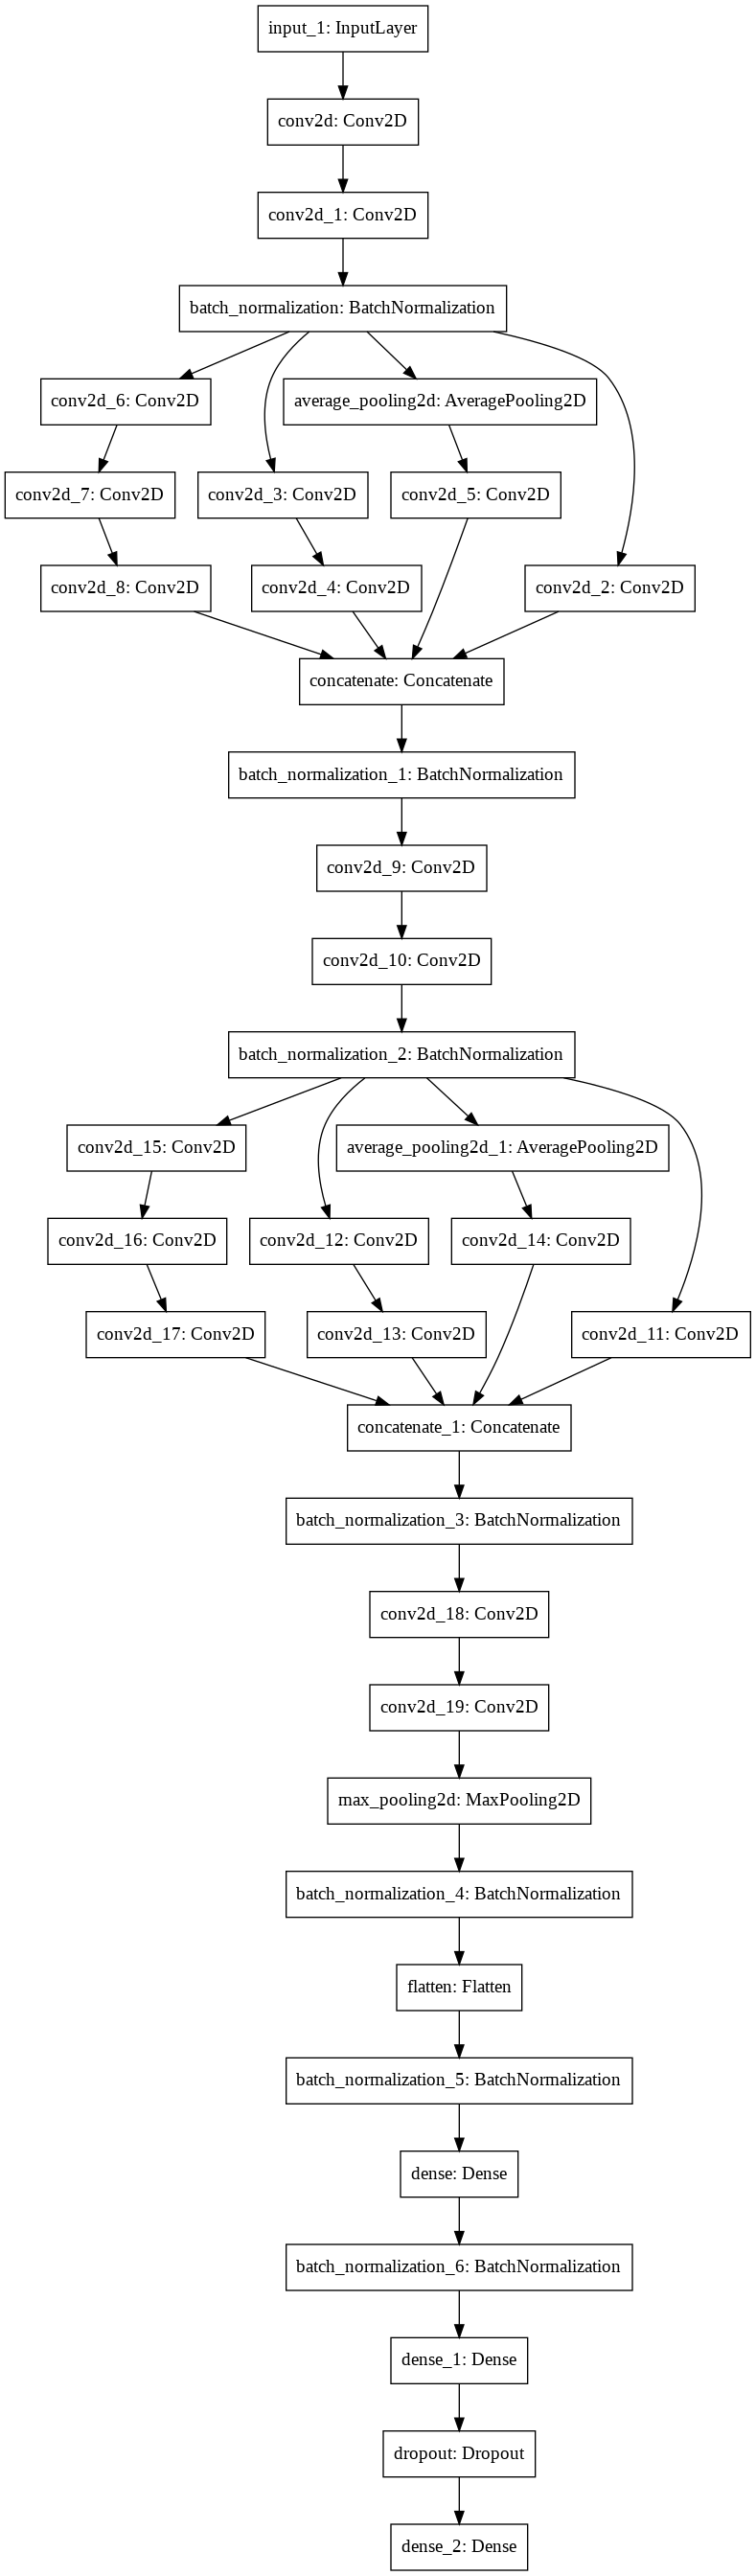

In [0]:
# Optimize your network
# first input model
backend.clear_session()
visible1 = Input(shape=(32,32,3))

# Conv2D
conv11 = Conv2D(32, (3,3), padding='same', activation='relu')(visible1)
conv12 = Conv2D(32, (3,3), padding='same', activation='relu')(conv11)
batch1 = BatchNormalization(axis = -1)(conv12)

# Tower 1
tower111 = Conv2D(64, (1,1), strides = 2, padding='same', activation='relu')(batch1)

# Tower 2
tower121 = Conv2D(64, (1,1), padding='same', activation='relu')(batch1)
tower122 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower121)


# Tower 3
tower131 = AveragePooling2D((3,3), strides = 2, padding='same')(batch1)
tower132 = Conv2D(64, (3,3), padding='same', activation='relu')(tower131)


# Tower 4
tower141 = Conv2D(64, (1,1), padding='same', activation='relu')(batch1)
tower142 = Conv2D(64, (3,3), padding='same', activation='relu')(tower141)
tower143 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower142)


# Concatenate
concat1 = Concatenate(axis=-1)([tower111, tower122, tower132, tower143])
batch2 = BatchNormalization(axis = -1)(concat1)

# Conv2D
conv21 = Conv2D(64, (3,3), padding='same', activation='relu')(batch2)
conv22 = Conv2D(64, (3,3), padding='same', activation='relu')(conv21)
batch3 = BatchNormalization(axis = -1)(conv22)

###############################

tower211 = Conv2D(64, (1,1), strides = 2, padding='same', activation='relu')(batch3)

# Tower 2
tower221 = Conv2D(64, (1,1), padding='same', activation='relu')(batch3)
tower222 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower221)


# Tower 3
tower231 = AveragePooling2D((3,3), strides = 2, padding='same')(batch3)
tower232 = Conv2D(64, (3,3), padding='same', activation='relu')(tower231)


# Tower 4
tower241 = Conv2D(64, (1,1), padding='same', activation='relu')(batch3)
tower242 = Conv2D(64, (3,3), padding='same', activation='relu')(tower241)
tower243 = Conv2D(64, (3,3), strides = 2, padding='same', activation='relu')(tower242)


# Concatenate
concat2 = Concatenate(axis=-1)([tower211, tower222, tower232, tower243])
batch4 = BatchNormalization(axis = -1)(concat2)

# Conv2D
conv31 = Conv2D(128, (3,3), padding='same', activation='relu')(batch4)
conv32 = Conv2D(128, (3,3), padding='same', activation='relu')(conv31)
conv33 = MaxPooling2D((3,3), padding='same')(conv32)
batch5 = BatchNormalization(axis = -1)(conv33)

###############################

# Flatten
flat = Flatten()(batch5)
batch6 = BatchNormalization(axis = -1)(flat)

# Dense and output
dense1 = Dense(128, activation='relu')(batch6)
batch7 = BatchNormalization(axis = -1)(dense1)
dense2 = Dense(64, activation='relu')(batch7)
drop = Dropout(0.5)(dense2)
output = Dense(10, activation='softmax')(drop)
model_best = Model(inputs=visible1, outputs=output)

# plot graph
plot_model(model_best)

Epoch 1/50
1172/1172 [==============================] - 18s 16ms/step - loss: 1.6770 - accuracy: 0.3988 - val_loss: 1.3189 - val_accuracy: 0.5390
Epoch 2/50
1172/1172 [==============================] - 18s 16ms/step - loss: 1.2025 - accuracy: 0.5790 - val_loss: 1.0142 - val_accuracy: 0.6409
Epoch 3/50
1172/1172 [==============================] - 18s 16ms/step - loss: 0.9924 - accuracy: 0.6583 - val_loss: 1.0549 - val_accuracy: 0.6439
Epoch 4/50
1172/1172 [==============================] - 18s 15ms/step - loss: 0.8560 - accuracy: 0.7114 - val_loss: 0.7481 - val_accuracy: 0.7391
Epoch 5/50
1172/1172 [==============================] - 18s 16ms/step - loss: 0.7584 - accuracy: 0.7466 - val_loss: 0.7621 - val_accuracy: 0.7429
Epoch 6/50
1172/1172 [==============================] - 18s 16ms/step - loss: 0.6642 - accuracy: 0.7778 - val_loss: 0.7385 - val_accuracy: 0.7575
Epoch 7/50
1172/1172 [==============================] - 18s 16ms/step - loss: 0.5840 - accuracy: 0.8067 - val_loss: 0.6608 -

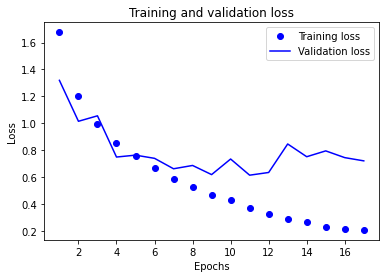

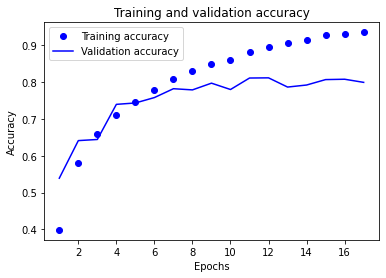

313/313 [==============================] - 2s 6ms/step - loss: 0.6221 - accuracy: 0.8097
test_accuracy: 0.8097000122070312


In [0]:

model_best.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])


history = model_best.fit(x_train, y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

test_loss, test_acc = model_best.evaluate(test_images, test_labels)
print('test_accuracy:', test_acc)

### What are the benifits of Funtional API models.  Give an hypothetical example (different than the book) where having different input types would be benificial in API models.  Give another hypotheical exmple (different than the book) where having different output types would be benificial in API models

### Comment on the model arcitecture that worked the best. What was the accuracy? Did you improve accuracry from last week?  How long did the training take?